# Citibike NYC October 2019 Dataset Exploration
## by Alex Yu

This document explores a dataset of the ride histories of New York City's Citibike bikeshare system in October 2019. The dataset is downloaded from Citibike's official website:
https://www.citibikenyc.com/system-data

For this analysis, I am particularly interested in finding out where in the city did most of the bike rental happen in October 2019. Once the areas with the most bike rental activities are located, I am interested in understanding the composition of the users of rentals in these area, with an intention of providing insights to marketing agencies.

In [190]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import Image
%matplotlib inline

Image(url = 'https://d21xlh2maitm24.cloudfront.net/nyc/biking-in-nyc.png?mtime=20170103145903',width=700)

In [191]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('201810-citibike-tripdata.csv')

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878657 entries, 0 to 1878656
Data columns (total 15 columns):
tripduration               int64
starttime                  object
stoptime                   object
start station id           float64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             float64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 int64
gender                     int64
dtypes: float64(6), int64(4), object(5)
memory usage: 215.0+ MB


In [193]:
df.sample()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1171590,223,2018-10-19 07:50:37.4510,2018-10-19 07:54:21.1970,3367.0,5 Ave & E 103 St,40.792255,-73.952499,3292.0,5 Ave & E 93 St,40.785785,-73.957481,34765,Subscriber,1970,2


### What is the structure of your dataset?

There are 1878657 entries in the dataset with 15 features, including:
- Trip Duration (seconds)
- Start Time and Date
- Stop Time and Date
- Start Station Name
- End Station Name
- Station ID
- Station Lat/Long
- Bike ID
- User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
- Gender (Zero=unknown; 1=male; 2=female)
- Year of Birth

### What is/are the main feature(s) of interest in your dataset?

As stated in the introduction, I am particularly interested in finding out where in the city do most of the bike rental happens in October 2019. Start station and end station name will be the first two features to look at, in order to find the area with the most bike rental activities. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

To make a visualization of the rental activities on a New York City map, we can use the latitude/longitude informations of the stations. To understand the composition of the rental users in these areas we can use the gender, user type and year of birth features.

## Univariate Exploration

I'll start by looking into the 5 most popular start station and end stations.

In [296]:
top5_start = df['start station name'].value_counts()[:5]
top5_start

Pershing Square North    16264
Broadway & E 22 St       11935
E 17 St & Broadway       11537
W 21 St & 6 Ave          11467
8 Ave & W 33 St          10428
Name: start station name, dtype: int64

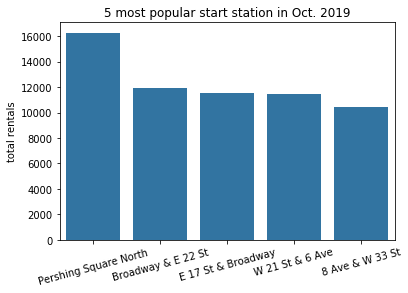

In [195]:
base_color = sb.color_palette()[0]
chart = sb.barplot(top5_start.index.values, top5_start, color = base_color)
chart.set_xticklabels(chart.get_xticklabels(), rotation=15);
chart.set_ylabel('total rentals')
chart.set_title('5 most popular start station in Oct. 2019');

In [196]:
top5_end = df['end station name'].value_counts()[:5]
top5_end

Pershing Square North    16271
E 17 St & Broadway       12117
Broadway & E 22 St       11971
W 21 St & 6 Ave          11589
8 Ave & W 33 St          10397
Name: end station name, dtype: int64

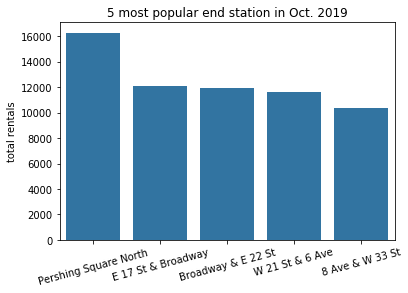

In [197]:
base_color = sb.color_palette()[0]
chart = sb.barplot(top5_end.index.values, top5_end, color = base_color)
chart.set_xticklabels(chart.get_xticklabels(), rotation=15);
chart.set_ylabel('total rentals')
chart.set_title('5 most popular end station in Oct. 2019');

Unsurprisingly, the top 5 start stations and top 5 end stations are the same stations. 4 of the 5 stations are close to an obvious landmark.

1. **Pershing Square North** -> Grand Central Station
2. **E 17 St & Broadway** -> Union Square 
3. **Broadway & E 22 St** -> Flatiron Building
4. **W 21 St & 6 Ave** -> In the center of Midtown, but no obvious landmark
5. **8 Ave & W 33 St** -> Penn Station

Before moving on to bivariate exploration, we can also look at the gender and usertype to establish a refernce point for later analysis.

In [198]:
n = df.shape[0]
df['gender'].value_counts()/n

1    0.694235
2    0.238886
0    0.066879
Name: gender, dtype: float64

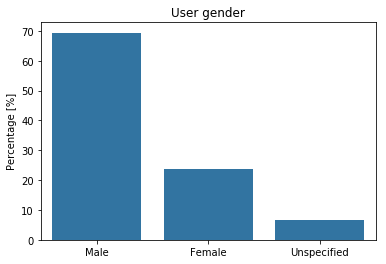

In [199]:
gender_list = ['Male', 'Female', 'Unspecified'];
chart = sb.barplot(gender_list, df['gender'].value_counts()/n * 100, color = base_color)
chart.set_ylabel('Percentage [%]')
chart.set_title('User gender');

We can exclude the unspecified rows and see the adjusted percentages.

In [270]:
n2 = df.query('gender !=0').shape[0]
(df['gender'].value_counts()/n2)[:2]

1    0.743992
2    0.256008
Name: gender, dtype: float64

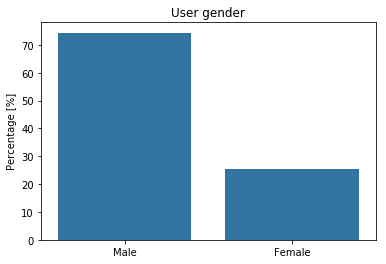

In [271]:
gender_list = ['Male', 'Female'];
chart = sb.barplot(gender_list, (df['gender'].value_counts()/n2)[:2]* 100, color = base_color)
chart.set_ylabel('Percentage [%]')
chart.set_title('User gender');

In [200]:
df['usertype'].value_counts()/n

Subscriber    0.897586
Customer      0.102414
Name: usertype, dtype: float64

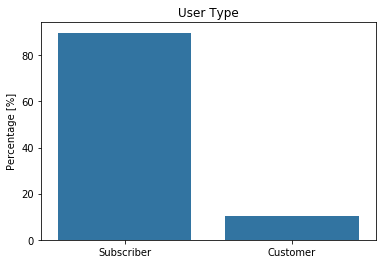

In [422]:
usertype_list = ['Subscriber', 'Customer'];
chart = sb.barplot(usertype_list, (df['usertype'].value_counts()/n)* 100, color = base_color)
chart.set_ylabel('Percentage [%]')
chart.set_title('User Type');

In [201]:
df['usertype'].value_counts()

Subscriber    1686256
Customer       192401
Name: usertype, dtype: int64

We see that the users of citibikes are primarily male (~74%). The users are also overwhelmingly subscribers of Citibike (~90%), indicating that they use the service frequently.


## Bivariate Exploration

For this part of the analysis, we can focus on the top 5 stations, and compare how the demographics of each station differ from the others and city-wide averages.

Here I'd like to extract gender and usertype data for each of the 5 stations, and compare them using stacked bar charts. 

In [373]:
top5_list = top5_start.index.values

total_traffic = []
female_list = []
male_list = []
customer_list = []
subscriber_list = []

for i in range(5):
    df_temp = df[(df['start station name'] == top5_list[i]) | (df['end station name'] == top5_list[i])]
    
    total_traffic.append(len(df_temp)) # used later in multivariate exploration
    
    gender_specified = df_temp.query('gender != 0').shape[0] # total of number of entries with specified gender
    male_list.append(df_temp.query('gender == 1').shape[0]/gender_specified)
    female_list.append(df_temp.query('gender == 2').shape[0]/gender_specified)
    
    subscriber_list.append(df_temp.query('usertype == "Subscriber"').shape[0]/len(df_temp))
    customer_list.append(df_temp.query('usertype == "Customer"').shape[0]/len(df_temp))

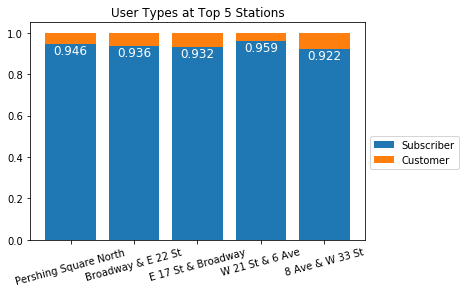

In [374]:
baselines = np.zeros(5)
plt.bar(x = np.arange(5), height = subscriber_list, bottom = baselines)
baselines += subscriber_list
plt.bar(x = np.arange(5), height = customer_list, bottom = baselines)

plt.xticks(np.arange(5), top5_list, rotation = 15)
plt.legend(['Subscriber','Customer'],bbox_to_anchor = (1, 0.5))
plt.title('User Types at Top 5 Stations')
for i in range(5):
    plt.text(x = np.arange(5)[i]-0.27, y = subscriber_list[i]-0.05, s = round(subscriber_list[i],3), size = 12, color = 'white')

Surprisingly, at the top 5 stations, where one would expect more tourists and thus higher (short-term) customer percentages, the percentages of subscribers are even slightly above the city average of 90%. 

With a quick look at the pricing scheme of Citibike (https://www.citibikenyc.com/pricing) we see that the 1-year subcription (\$169/year = \$14/month) is a much more attractive deal for users who use the bikeshare for more than 1 day (\$12 for daypass) every month for 12 months. From this, we can deduce that the majority of the traffic is contributed by users who are commited to using the service frequently, likely New York City residents.

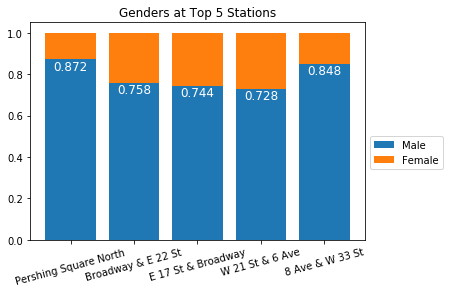

In [375]:
baselines = np.zeros(5)
plt.bar(x = np.arange(5), height = male_list, bottom = baselines)
baselines += male_list
plt.bar(x = np.arange(5), height = female_list, bottom = baselines)

plt.xticks(np.arange(5), top5_list, rotation = 15)
plt.legend(['Male','Female'],bbox_to_anchor = (1, 0.5))
plt.title('Genders at Top 5 Stations')
for i in range(5):
    plt.text(x = np.arange(5)[i]-0.27, y = male_list[i]-0.05, s = round(male_list[i],3), size = 12, color = 'white')

Here we see that the male percentages are even higher at stations close to the train station. 

## Multivariate Exploration

Here we can display the informations we obtained (gender percentage, subscriber percentage) on a New York City map using the lat/long data and a library called folium. In fact, we can broaden our reach to the top 100 stations to get a better idea of the Citibike usage.

To start, we create a new dataframe with the necessary information.

In [393]:
# This cell takes about 1 minute to run
import folium

# Retrieve lat/long information
top100_list = df['start station name'].value_counts()[:100].index.values

lat_list = []
long_list = []
total_traffic = []
female_list = []
male_list = []
customer_list = []
subscriber_list = []

for i in range(100):
    df_temp = df[(df['start station name'] == top100_list[i]) | (df['end station name'] == top100_list[i])]
    
    total_traffic.append(len(df_temp)) # used later in multivariate exploration
    
    gender_specified = df_temp.query('gender != 0').shape[0] # total of number of entries with specified gender
    male_list.append(df_temp.query('gender == 1').shape[0]/gender_specified)
    female_list.append(df_temp.query('gender == 2').shape[0]/gender_specified)
    
    subscriber_list.append(df_temp.query('usertype == "Subscriber"').shape[0]/len(df_temp))
    customer_list.append(df_temp.query('usertype == "Customer"').shape[0]/len(df_temp))

    df_samp = df[df['start station name'] == top100_list[i]]
    lat_list.append(df_samp['start station latitude'].value_counts().index.values[0])
    long_list.append(df_samp['start station longitude'].value_counts().index.values[0])

# Create new dataframe
data = {'station_name': top100_list,
        'total_traffic': total_traffic,
        'male_percentage': male_list,
        'subscriber_percentage': subscriber_list,
        'latitude': lat_list,
        'longitude': long_list}

df_top100 = pd.DataFrame(data)
df_top100

,latitude,longitude,male_percentage,station_name,subscriber_percentage,total_traffic
0,40.751873,-73.977706,0.871520,Pershing Square North,0.945585,32454
1,40.740343,-73.989551,0.757676,Broadway & E 22 St,0.935949,23809
2,40.737050,-73.990093,0.743990,E 17 St & Broadway,0.931927,23563
3,40.741740,-73.994156,0.728378,W 21 St & 6 Ave,0.958663,22982
4,40.751551,-73.993934,0.848241,8 Ave & W 33 St,0.921800,20729
5,40.750585,-73.994685,0.844270,8 Ave & W 31 St,0.936595,20440
6,40.717548,-74.013221,0.677741,West St & Chambers St,0.839206,19696
7,40.730207,-73.991026,0.747476,Lafayette St & E 8 St,0.937357,18757
8,40.734546,-73.990741,0.750461,Broadway & E 14 St,0.927919,18729
9,40.746745,-74.007756,0.749667,W 20 St & 11 Ave,0.878937,18635


In [414]:
# Referenece for folium: https://blog.prototypr.io/interactive-maps-with-python-part-1-aa1563dbe5a9

folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

# Iterate through the 5 stations to create markers
for index, row in df_top100.iterrows():
    radius = row['total_traffic']/1800 #radius corresponds to total traffic of the station
    
    # Top 10 will be in tangerine
    if index > 9:
        color="#0A8A9F" # teal
    else:
        color="#E37222" # tangerine
        
    popup_text = """<b>{}</b><br>
                total traffic: {}<br> 
                subscriber percentage: {}<br>
                male percentage: {}"""
    popup_text = popup_text.format(row["station_name"],
                               row["total_traffic"],
                               round(row["subscriber_percentage"],3),
                               round(row["male_percentage"],3))    
    folium.CircleMarker(location=(row["latitude"],
                                  row["longitude"]),
                        radius=radius,
                        color=color,
                        popup=popup_text,
                        fill=True).add_to(folium_map)

In [415]:
#Display map
folium_map

With the visualisation, we can see that the most of the traffic happen in Manhattan, mostly south of central park. Out of the top 10 stations, colored in tangerine, 8 are in midtown and 2 in downtown. Only 2 out of the top 100 stations are in Brooklyn. 

We can also use the map to highlight the top 10 stations with highest female percentages.

In [406]:
df_top100.nsmallest(10, 'male_percentage')

,latitude,longitude,male_percentage,station_name,subscriber_percentage,total_traffic
6,40.717548,-74.013221,0.677741,West St & Chambers St,0.839206,19696
94,40.715348,-73.960241,0.680360,Metropolitan Ave & Bedford Ave,0.885332,10247
78,40.775794,-73.976206,0.683471,Central Park West & W 72 St,0.595648,10570
25,40.765909,-73.976342,0.687054,Central Park S & 6 Ave,0.512099,15208
38,40.718822,-73.995960,0.693621,Grand St & Elizabeth St,0.900174,13764
39,40.727103,-74.002971,0.702342,MacDougal St & Prince St,0.929075,13620
34,40.777057,-73.978985,0.707500,Columbus Ave & W 72 St,0.922458,12548
86,40.714275,-73.989900,0.708395,Canal St & Rutgers St,0.934476,10561
37,40.712733,-74.004607,0.710072,Centre St & Chambers St,0.616131,13812
77,40.723180,-73.994800,0.715701,Mott St & Prince St,0.892003,11167


In [420]:
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

# Iterate through the 5 stations to create markers
for index, row in df_top100.iterrows():
    radius = row['total_traffic']/1800 #radius corresponds to total traffic of the station
    
    if index in df_top100.nsmallest(10, 'male_percentage').index.tolist():
        color="#0A8A9F" # teal
    else:
        color="#E37222" # tangerine
        
        
    popup_text = """<b>{}</b><br>
                total traffic: {}<br> 
                subscriber percentage: {}<br>
                male percentage: {}"""
    popup_text = popup_text.format(row["station_name"],
                               row["total_traffic"],
                               round(row["subscriber_percentage"],3),
                               round(row["male_percentage"],3))    
    folium.CircleMarker(location=(row["latitude"],
                                  row["longitude"]),
                        radius=radius,
                        color=color,
                        popup=popup_text,
                        fill=True).add_to(folium_map)

In [421]:
folium_map 

Interestingly, we see that the stations with the highest female user percentages are in downtown (6 out of 10), around central park (3 out of 10), and in Brooklyn. 

Finally, we use the map to highlight the top 10 stations with highest (short-term) customer percentages.

In [407]:
df_top100.nsmallest(10, 'subscriber_percentage')

,latitude,longitude,male_percentage,station_name,subscriber_percentage,total_traffic
25,40.765909,-73.976342,0.687054,Central Park S & 6 Ave,0.512099,15208
78,40.775794,-73.976206,0.683471,Central Park West & W 72 St,0.595648,10570
37,40.712733,-74.004607,0.710072,Centre St & Chambers St,0.616131,13812
16,40.764397,-73.973715,0.757948,Grand Army Plaza & Central Park S,0.657035,15401
10,40.760875,-74.002777,0.736632,12 Ave & W 40 St,0.766061,18103
50,40.739323,-74.008119,0.723639,Washington St & Gansevoort St,0.792120,12690
21,40.769155,-73.981918,0.730298,Broadway & W 60 St,0.808627,15974
27,40.711512,-74.015756,0.732936,South End Ave & Liberty St,0.828444,15954
62,40.766953,-73.981693,0.749740,Broadway & W 58 St,0.830616,11654
6,40.717548,-74.013221,0.677741,West St & Chambers St,0.839206,19696


In [418]:
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

# Iterate through the 5 stations to create markers
for index, row in df_top100.iterrows():
    radius = row['total_traffic']/1800 #radius corresponds to total traffic of the station
    
    if index in df_top100.nsmallest(10, 'subscriber_percentage').index.tolist():
        color="#0A8A9F" # teal
    else:
        color="#E37222" # tangerine
        
        
    popup_text = """<b>{}</b><br>
                total traffic: {}<br> 
                subscriber percentage: {}<br>
                male percentage: {}"""
    popup_text = popup_text.format(row["station_name"],
                               row["total_traffic"],
                               round(row["subscriber_percentage"],3),
                               round(row["male_percentage"],3))    
    folium.CircleMarker(location=(row["latitude"],
                                  row["longitude"]),
                        radius=radius,
                        color=color,
                        popup=popup_text,
                        fill=True).add_to(folium_map)

In [419]:
folium_map 

We see that the 10 stations with the highest non-subscriber (likely tourist) percentages are around central park (5 out of 10), along hudson river (4 out of 10), and in financial district (3 out of 10).

## Summary

With the earlier exploration, we see that: 
- majority of the Citibike users in October 2019 are subscribers (90% overall) and male (74% overall)
- compositions of 5 most popular stations adhere to this trend 

Then we visualized the top 100 most popular stations, highlighting the 10 stations with most female percentages and the 10 stations with most non-subscriber percentages. Interestingly, these top 10s do not coincide with the 10 most populat stations. 

### Insights:
These insights can be use for marketing agencies, if they want to advertise to specific groups of Citibike users. For example, a city-wide advertisement campaign using Citibike system would be shown to a predominantly male audience, mostly of whom are likely New York City residents. 

And if agencies want to advertise to female users, they would do well placing advertisements:
- around Central Park
- south of 14th St.

If agencies want to advertise to non-subscribers, they should consider placing advertisements:
- around Central Park
- along Hudson River
- in Financial District.